In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

df = pd.read_csv('data/projects.csv')

df.head()

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


Manipulating CSV and adding a new column for better formatting 

In [39]:
df['finalizado'] = df['nao_finalizado'].map({1:0, 0:1})

df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


Generate a graph with seaborn to get a better view of the df

<Axes: xlabel='horas_esperadas', ylabel='preco'>

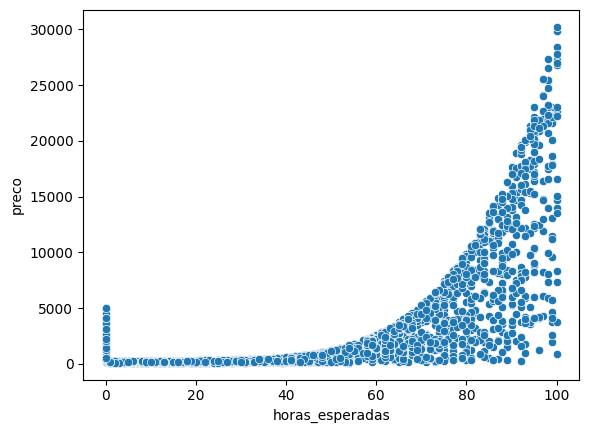

In [48]:
sns.scatterplot(x='horas_esperadas', y='preco', data=df)

Now we gonna generate two graphs, the first with FINALIZADO = 0 and the second with FINALIZADO = 1

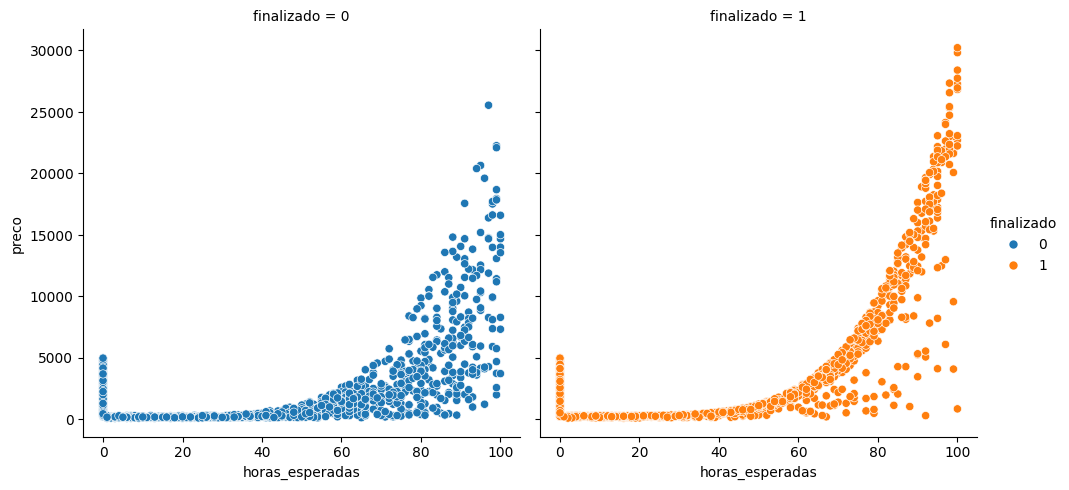

In [46]:
sns.relplot(x='horas_esperadas', y='preco', data=df, hue='finalizado', col='finalizado')

Deleting the lines with HORAS_ESPERADAS = 0

In [54]:
df['finalizado'] = df['nao_finalizado'].map({1:0, 0:1})

df = df.query('horas_esperadas > 0')

df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


Trainning the model

In [59]:
y = df['finalizado']

x = df[['horas_esperadas', 'preco']]

seed = 1213

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state=seed, stratify=y)

model = LinearSVC()
model.fit(x,y)

prevision = model.predict(x)

accuracy = accuracy_score(y, prevision) * 100

print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 56.47%


Creating a basic forecast to the model

In [60]:
basePrevision = teste_y.sum() / len(teste_y) * 100
print("Accuracy base: %.2f" % basePrevision)

Accuracy base: 52.59


In [62]:
min_x = teste_x["horas_esperadas"].min()
max_x = teste_x["horas_esperadas"].max()

min_y = teste_x["preco"].min()
max_y = teste_x["preco"].max()

print(min_x, max_x, min_y, max_y)

1.0 100.0 101.0 24142.0


In [66]:
pixels = 100


x_axis = np.arange(min_x, max_x, (max_x - min_x) / pixels)
y_axis = np.arange(min_y, max_y, (max_y - min_y) / pixels)


In [72]:
xx, yy = np.meshgrid(x_axis, y_axis)

points = np.c_[xx.ravel(), yy.ravel()]

In [83]:
z = model.predict(points)

z = np.array(z).reshape(xx.shape)

/home/pedrosalzani/Documents/Codes - STUDIES/Machine Learning 01 - Alura/firstModel/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


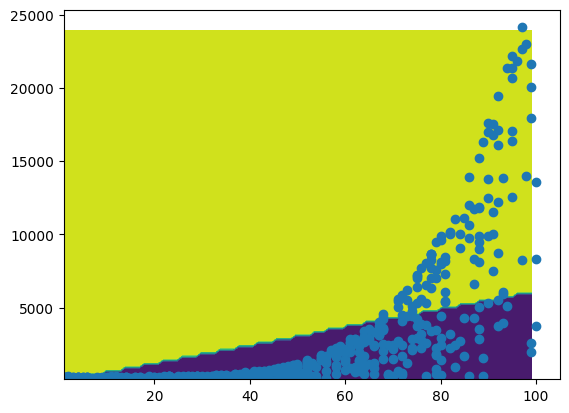

In [88]:
plt.contourf(xx, yy, z)

plt.scatter(teste_x["horas_esperadas"], teste_x["preco"])